<a href="https://colab.research.google.com/github/vaniago/base-pandas/blob/main/IntroPandas_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Introdução ao Pandas 3**

#Importar, analisar, modificar e salvar um dataframe

##Métodos de importação e exportação: *pd.read_NNN()* e *df.to_NNN()*

Pandas provê uma família de métodos de leitura e escrita em diferentes formatos, a tabela a seguir mostra alguns deles:


**Métodos de leitura e escrita de dataframes**

| Formato                           | Leitura                | Escrita              |
|-----------------------------------|------------------------|----------------------|
| csv=comma separated values        | pd.read_csv()          | df.to_csv()          |
| excel xls, xlsx                   | pd.read_excel()        | df.to_excel          |
| fwf=fixed width formatted         | pd.read_fwf()          | df.to_csv()          |
| html                              | pd.read_html()         | df.to_html()         |
| xml                               | pd.read_xml()          | df.to_xml()          |
| hdf= hierarchical data format 5   | pd.read_hdf()          | df.to_hdf()          |
| sas = XPORT or SAS7BDAT           | pd.read_sas()          | -                    |
| spss                              | pd.read_spss()         | -                    |
| sql                               | pd.read_sql()          | df.to_sql()          |
| gbq= google BigQuery              | pd.read_gbq()          | df.to_gbq()          |
| stata                             | pd.read_stata()        | df.to_stata()        |
| json                              | pd.io.json.read_json() | pd.io.json.to_json() |
| table: tabela genérica delimitada | pd.read_table()        | df.to_csv()          |

##Importar um arquivo csv, gerar um gráfico e salvar como png.

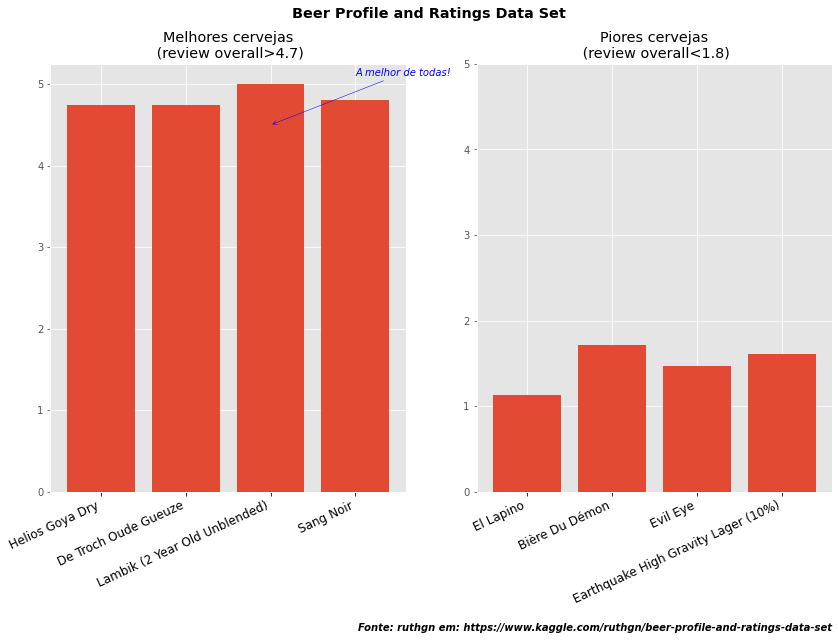

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


#recebe o arquivo
bdat=pd.read_csv('beer_ratings.csv') 

#separa melhores e piores
b1dat=bdat[(bdat.review_overall>4.7)]
b2dat=bdat[(bdat.review_overall<1.8)]

#gera gráficos dos melhores e piores
#estilo
plt.style.use('ggplot')

#tamanho
plt.rcParams['figure.figsize'] = (14,7.875)

#dois gráficos, cada um é um eixo da figura
figura, eixo = plt.subplots(1,2)

#título e indicação de fonte
figura.suptitle('Beer Profile and Ratings Data Set',weight='black',color='black',size='x-large')
footer_text = 'Fonte: ruthgn em: https://www.kaggle.com/ruthgn/beer-profile-and-ratings-data-set'
plt.figtext(0.9, -0.12, footer_text, horizontalalignment='right', size=10, weight='black',style='italic')

#define a figura das melhores
eixo[0].bar(
        b1dat.Name,
        b1dat.review_overall)
eixo[0].set(title="Melhores cervejas\n (review overall>4.7)")
eixo[0].annotate("A melhor de todas!", 
            xy=(2, 4.5),
            xycoords='data',
            xytext=(3, 5.1),
            textcoords='data',
            color='blue',
            style='italic',
            arrowprops=dict(arrowstyle="->",connectionstyle="arc3",color='blue'))

eixo[0].tick_params(axis='x', colors='black',labelsize='large')
plt.setp(eixo[0].get_xticklabels(), rotation=25, horizontalalignment='right')

#define a figura das piores
eixo[1].bar(
        b2dat.Name,
        b2dat.review_overall)

eixo[1].set(title="Piores cervejas\n (review overall<1.8)")

#muda o limite para ficar comparável ao outro gráfico
eixo[1].set_ylim([0, 5])
eixo[1].tick_params(axis='x', colors='black',labelsize='large')
plt.setp(eixo[1].get_xticklabels(), rotation=25, horizontalalignment='right')

#cria os gráficos
plt.savefig('ratings.png', format='png',bbox_inches = "tight")
plt.show()


##Calcular estatísticas


###Sumário estatístico: *describe()*

O método *describe* gera um resumo estatístico dos dados.

####Para dados numéricos

In [ ]:
#usando bdat definido acima

print(bdat[["ABV","review_aroma","review_overall"]].describe())

               ABV  review_aroma  review_overall
count  3197.000000   3197.000000     3197.000000
mean      6.526688      3.638789        3.747522
std       2.546997      0.503209        0.444288
min       0.000000      1.509615        1.136364
25%       5.000000      3.422559        3.566667
50%       6.000000      3.720183        3.830239
75%       7.600000      3.978000        4.032847
max      57.500000      5.000000        5.000000


####Para dados categoriais, não-numéricos

*describe()* também se aplica a dados não-numéricos, fazendo a contagem de tipos únicos e indicando o mais frequente.

In [ ]:
#usando bdat definido acima

print(bdat[["Style","Brewery"]].describe())

                  Style                             Brewery
count              3197                                3197
unique              111                                 934
top     Lager - Adjunct  Boston Beer Company (Samuel Adams)
freq                 45                                  40


Pelo resultado, temos 111 estilos diferentes, sendo o mais frequente *'Lager - Adjunct'* com 45 elementos.

###Outras ações com dados não-numéricos

####Apresentar os nomes dos estilos únicos: *unique()*

O método *unique* permite identificar quais são os valores distintos de uma categoria:

In [ ]:
unicos=bdat.Style.unique()
for estilo in unicos:
  print(estilo)

Altbier
Barleywine - American
Barleywine - English
Bitter - English Extra Special / Strong Bitter (ESB)
Bitter - English
Bière de Champagne / Bière Brut
Blonde Ale - American
Blonde Ale - Belgian
Bock - Doppelbock
Bock - Eisbock
Bock - Maibock
Bock - Traditional
Bock - Weizenbock
Braggot
Brett Beer
Brown Ale - American
Brown Ale - Belgian Dark
Brown Ale - English
California Common / Steam Beer
Chile Beer
Cream Ale
Dubbel
Farmhouse Ale - Bière de Garde
Farmhouse Ale - Sahti
Farmhouse Ale - Saison
Fruit and Field Beer
Gruit / Ancient Herbed Ale
Happoshu
Herb and Spice Beer
IPA - American
IPA - Belgian
IPA - Black / Cascadian Dark Ale
IPA - English
IPA - Imperial
IPA - New England
Kvass
Kölsch
Lager - Adjunct
Lager - American Amber / Red
Lager - American
Lager - European / Dortmunder Export
Lager - European Dark
Lager - European Pale
Lager - European Strong
Lager - Helles
Lager - India Pale Lager (IPL)
Lager - Japanese Rice
Lager - Kellerbier / Zwickelbier
Lager - Light
Lager - Malt Liquo

####Determinar a frequência de cada categoria: *value_counts()*

Para saber a frequência de cada um dos valores únicos, usa-se *value_counts()*

Exemplo: Calcular a frequência de cada estilo (Style) de cerveja.

In [ ]:
#fazer o pandas imprimir todas as linhas do dataframe
pd.set_option("display.max_rows", None, "display.max_columns", None)

#obter as frequências de cada categoria em Style
print(bdat['Style'].value_counts())

Lager - Adjunct                                         45
Lager - European Pale                                   43
Wheat Beer - Hefeweizen                                 42
Stout - Irish Dry                                       42
Lambic - Fruit                                          42
Strong Ale - Belgian Dark                               41
Bitter - English                                        41
Dubbel                                                  41
Winter Warmer                                           40
Lager - Light                                           40
Brown Ale - English                                     40
Pale Ale - English                                      40
Bock - Doppelbock                                       40
Strong Ale - Belgian Pale                               40
Lager - Märzen / Oktoberfest                            39
Altbier                                                 39
Lager - European Strong                                 

####Agrupar contagem entre categorias



#####Quantas cervejas de cada estilo são produzidas em cada uma das cervejarias, o que equivale a agrupar os estilos por cervejarias: *groupby()* e *value_counts()*

In [ ]:
#fazer o pandas imprimir todas as linhas do dataframe
#pd.set_option("display.max_rows", None, "display.max_columns", None)

#obter as frequências por cervejaria (Brewery) de cada categoria de estilo (Style)
print(bdat.groupby(['Brewery'])['Style'].value_counts())

#####Para um dado estilo (Style), saber quantos exemplares desse estilo cada cervejaria possui, o que equivale a agrupar por estilos a produção das cervejarias.

In [ ]:
#fazer o pandas imprimir todas as linhas do dataframe
#pd.set_option("display.max_rows", None, "display.max_columns", None)

#obter as frequências de Style de cada categoria em Brewery
print(bdat.groupby(['Style'])['Brewery'].value_counts())

####Contagem por grupo: count()

Quantas cervejas diferentes existem para cada estilo?

Observe que é o mesmo resultado de *describe()*, mas apresentado por ordem de estilos.

In [ ]:
#Quantas cervejas são produzidas naquele estilo
print(bdat.groupby(['Style'])['Brewery'].count())

Style
Altbier                                                 39
Barleywine - American                                   38
Barleywine - English                                    26
Bitter - English                                        41
Bitter - English Extra Special / Strong Bitter (ESB)    33
Bière de Champagne / Bière Brut                          8
Blonde Ale - American                                   31
Blonde Ale - Belgian                                    33
Bock - Doppelbock                                       40
Bock - Eisbock                                          14
Bock - Maibock                                          35
Bock - Traditional                                      34
Bock - Weizenbock                                       32
Braggot                                                 14
Brett Beer                                               3
Brown Ale - American                                    28
Brown Ale - Belgian Dark                          

Quantas cervejas são produzidas em cada cervejaria?

O resultado sai por ordem de cervejaria.

In [ ]:
#Quantas cervejas são produzidas por aquela cervejaria
print(bdat.groupby(['Brewery'])['Style'].count())

####Medidas estatísticas definidas pelo usuário

O método *agg* ou *aggregate* permite selecionar as medidas desejadas.

É possível usar medidas por funções e métodos pré-definidos ou funções definidas pelo usuário.

In [ ]:
#usando as variáveis da célula anterior

def q1(n): #primeiro quartil
    return n.quantile(0.25)

def q2(n): #mediana
    return n.quantile(0.5)

def q3(n): #terceiro quartil
    return n.quantile(0.75)


print(bdat[["ABV","review_aroma","review_overall"]].agg([sum,min,q1,q2,q3,max]))

          ABV  review_aroma  review_overall
sum  20865.82  11633.208005    11980.827409
min      0.00      1.509615        1.136364
q1       5.00      3.422559        3.566667
q2       6.00      3.720183        3.830239
q3       7.60      3.978000        4.032847
max     57.50      5.000000        5.000000


##Criar e exportar um dataframe a partir de outro dataframe

Suponha que queremos criar um dataframe e exportar as medidas obtidas no último exemplo para um arquivo csv:

In [ ]:
#usando as variáveis da célula anterior

def q1(n): #primeiro quartil
    return n.quantile(0.25)

def q2(n): #mediana
    return n.quantile(0.5)

def q3(n): #terceiro quartil
    return n.quantile(0.75)


novodf=bdat[["ABV","review_aroma","review_overall"]].agg([sum,min,q1,q2,q3,max])

novodf.to_csv('resumo.csv')
print(novodf)

          ABV  review_aroma  review_overall
sum  20865.82  11633.208005    11980.827409
min      0.00      1.509615        1.136364
q1       5.00      3.422559        3.566667
q2       6.00      3.720183        3.830239
q3       7.60      3.978000        4.032847
max     57.50      5.000000        5.000000
